In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


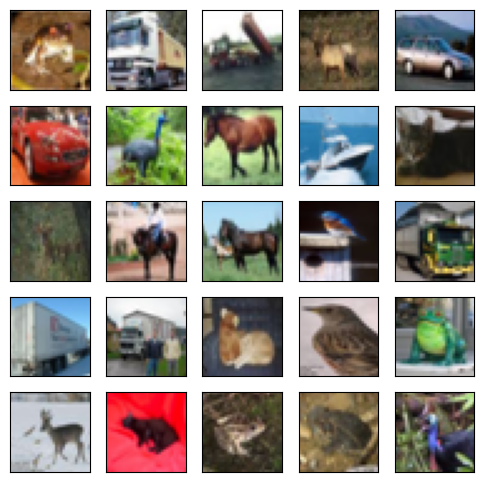

In [ ]:
plt.figure(figsize=(6,6))  # Keep the figure size small
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines
    plt.imshow(X_train[i])  # Display each image
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

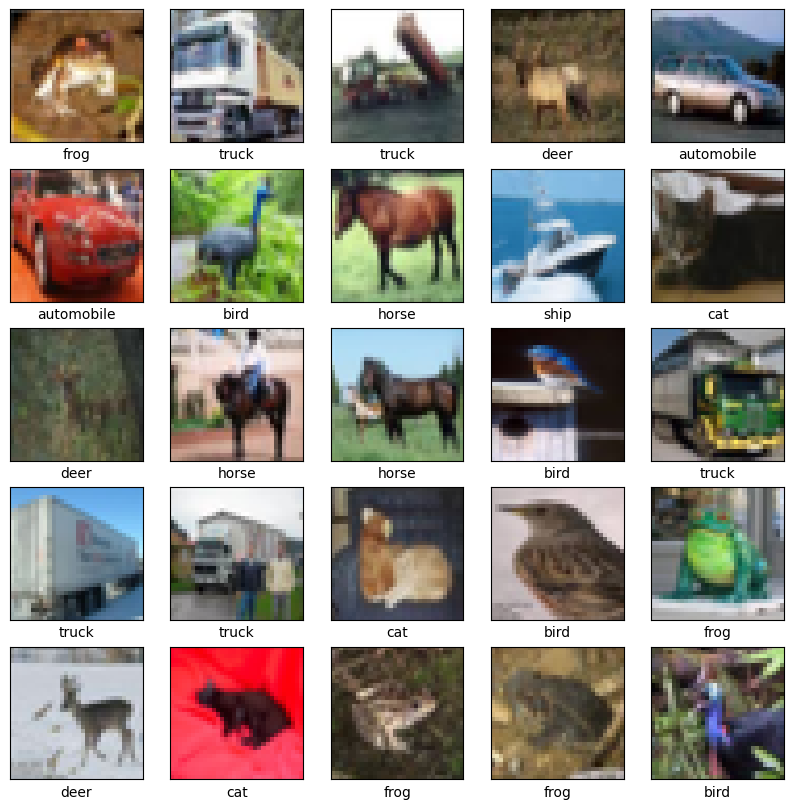

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 131ms/step - accuracy: 0.2469 - loss: 1.9968 - val_accuracy: 0.4481 - val_loss: 1.4914
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.4200 - loss: 1.5966 - val_accuracy: 0.5392 - val_loss: 1.2830
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 132ms/step - accuracy: 0.4808 - loss: 1.4502 - val_accuracy: 0.5699 - val_loss: 1.1885
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.5101 - loss: 1.3715 - val_accuracy: 0.5894 - val_loss: 1.1675
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.5399 - loss: 1.2992 - val_accuracy: 0.6319 - val_loss: 1.0367
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.5588 - loss: 1.2524 - val_accuracy: 0.6394 - val_loss: 1.0307
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.5781 - loss: 1.2047 - val_accuracy: 0.6549 - val_loss: 1.0154
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.5886 - loss: 1.18

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 8s - 25ms/step - accuracy: 0.6831 - loss: 0.9038
Test accuracy: 0.6830999851226807


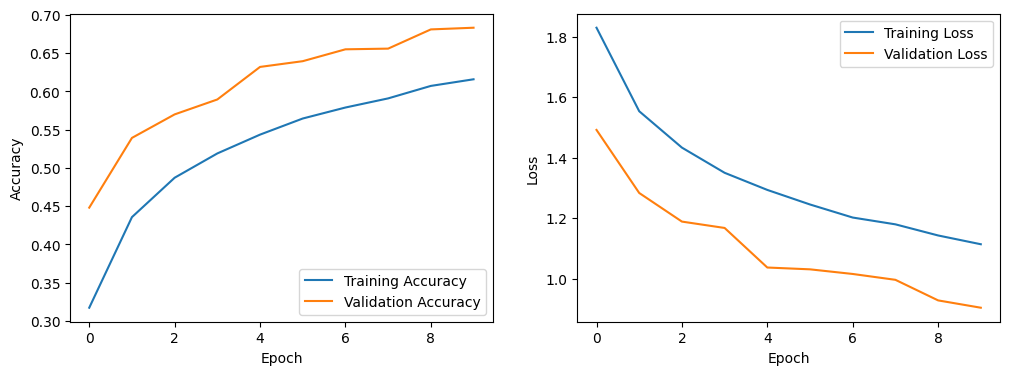

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

In [ ]:
# Define the model with an Input layer and L2 regularization
model = models.Sequential([
    Input(shape=(32, 32, 3)),  # Use Input layer at the start
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Save the model in the recommended Keras format
model.save('image_classification_model.keras')

